# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

623

In [29]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from weather_api import api
from pprint import pprint

# Generate API

In [64]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [65]:
# set up lists to hold reponse info
lat = []
temp = []
humidity=[]
cloudiness=[]
wind_speed=[]

for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

KeyError: 'coord'

In [66]:
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

ValueError: arrays must all be same length

# Create csv file from API

In [61]:
#set City as index
cities_df.index=cities
cities_df=cities_df[["Cloudiness","Humidity","Lat","Lng","Max Temp","Wind Speed"]]
cities_df.head()

ValueError: Length mismatch: Expected axis has 500 elements, new values have 623 elements

In [36]:
# Loop through the list of cities and perform a request for data on each

#temperature vs. latitutde
lat = []
temp = []
humidity=[]
cloudiness=[]
wind_speed=[]

for city in cities_df.index:
    lat.append(cities_df['Lat'][city])
    temp.append(cities_df['Max Temp'][city])
    humidity.append(cities_df['Humidity'][city])
    cloudiness.append(cities_df['Cloudiness'][city])
    wind_speed.append(cities_df['Wind Speed'][city])



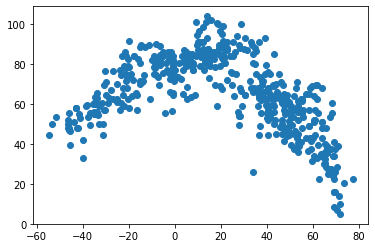

In [37]:
# Your first requirement is to create a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
plt.scatter(lat,temp)

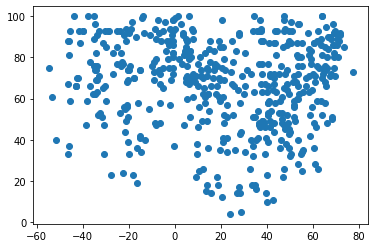

In [38]:
# Humidity (%) vs. Latitude
plt.scatter(lat,humidity)

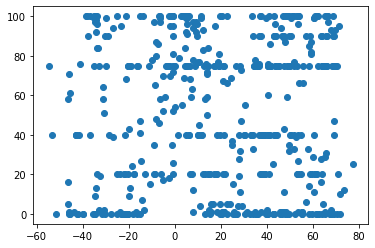

In [39]:
# Cloudiness (%) vs. Latitude
plt.scatter(lat,cloudiness)

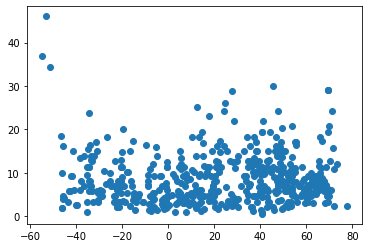

In [40]:
# Wind Speed (mph) vs. Latitude
plt.scatter(lat,wind_speed)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#  Get the indices of cities that have humidity over 100%.


In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression